# Basics of mobile robotics project - The Thytanic Navigation (2024)

## 1. Introduction & Context

| **Contributors**         | **Sciper**  | **Role**             | **Studies**                                                             |
|---------------------------|-------------|-----------------------|---------------------------------------------------------------------------|
| **Alessio Desogus**       | 301705      | Local Navigation      | Bachelor and Master in Mechanical Engineering.                            |
|   **Antoine Bachmann**    |  336641     | Global navigation      | Bachelor and Master in Computer Science                                   |
|                           |             |                       |                                                                           |
|                           |             |                       |                                                                           |

Date of deliverable: 05.12.2024  

Our main sources were the exercise sessions of the course and ....

### Project Description




### Environment



## 2. Initialization

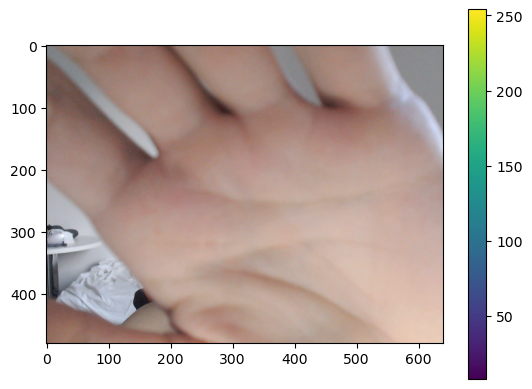

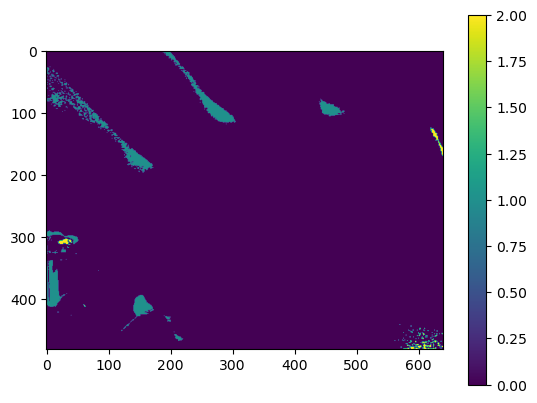

label 0 is 299749 pixels in size
label 1 is 184 pixels in size
label 2 is 1 pixels in size
label 3 is 3 pixels in size
label 4 is 31 pixels in size
label 5 is 1 pixels in size
label 6 is 12 pixels in size
label 7 is 1 pixels in size
label 8 is 19 pixels in size
label 9 is 8 pixels in size
label 10 is 2 pixels in size
label 11 is 1369 pixels in size
label 12 is 1 pixels in size
label 13 is 1 pixels in size
label 14 is 6 pixels in size
label 15 is 4 pixels in size
label 16 is 2 pixels in size
label 17 is 9 pixels in size
label 18 is 7 pixels in size
label 19 is 1 pixels in size
label 20 is 3 pixels in size
label 21 is 2 pixels in size
label 22 is 2 pixels in size
label 23 is 3 pixels in size
label 24 is 5 pixels in size
label 25 is 1 pixels in size
label 26 is 1 pixels in size
label 27 is 2 pixels in size
label 28 is 2 pixels in size
label 29 is 3 pixels in size
label 30 is 4 pixels in size
label 31 is 2 pixels in size
label 32 is 3 pixels in size
label 33 is 1 pixels in size
label 34 is

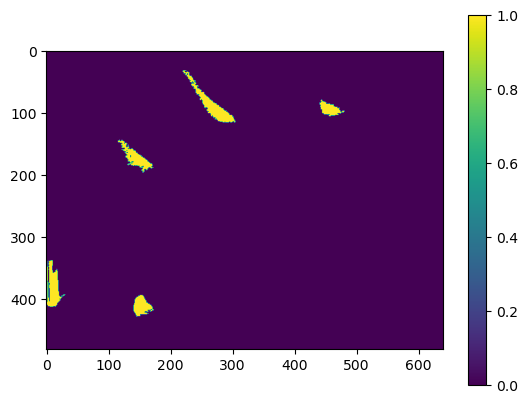

In [1]:
from local_navigation_and_control import ThytanicController, ThytanicState
from vision import generate_map
from global_navigation import downsamplingprep, downsampling, pathfinder
import numpy as np, matplotlib.pyplot as plt

In [2]:
# Initialize the ThytanicController
thytanic = ThytanicController()

## 3. Vision

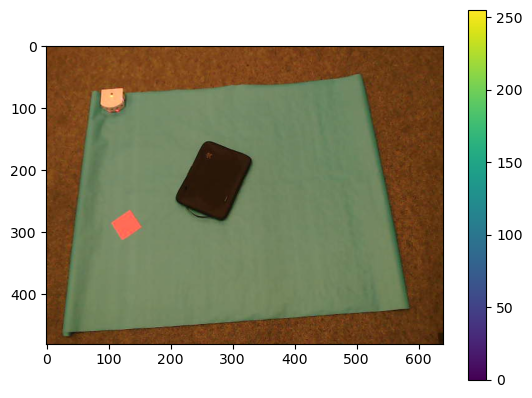

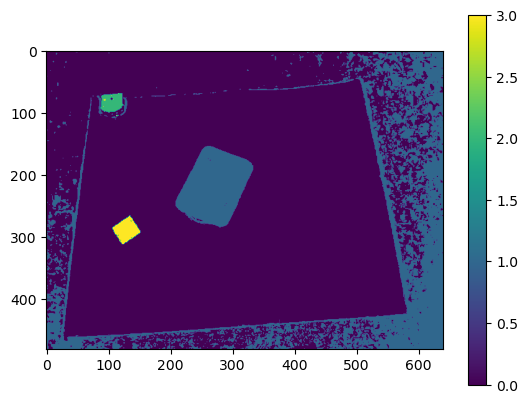

label 0 is 246895 pixels in size
label 1 is 8 pixels in size
label 2 is 3 pixels in size
label 3 is 5 pixels in size
label 4 is 2 pixels in size
label 5 is 147 pixels in size
label 6 is 40531 pixels in size
label 7 is 2 pixels in size
label 8 is 1 pixels in size
label 9 is 21 pixels in size
label 10 is 4 pixels in size
label 11 is 6 pixels in size
label 12 is 1 pixels in size
label 13 is 2 pixels in size
label 14 is 3 pixels in size
label 15 is 2 pixels in size
label 16 is 5 pixels in size
label 17 is 5 pixels in size
label 18 is 1 pixels in size
label 19 is 84 pixels in size
label 20 is 5 pixels in size
label 21 is 2 pixels in size
label 22 is 12 pixels in size
label 23 is 14 pixels in size
label 24 is 5 pixels in size
label 25 is 11 pixels in size
label 26 is 9 pixels in size
label 27 is 2 pixels in size
label 28 is 56 pixels in size
label 29 is 4 pixels in size
label 30 is 5 pixels in size
label 31 is 20 pixels in size
label 32 is 7 pixels in size
label 33 is 6 pixels in size
label 

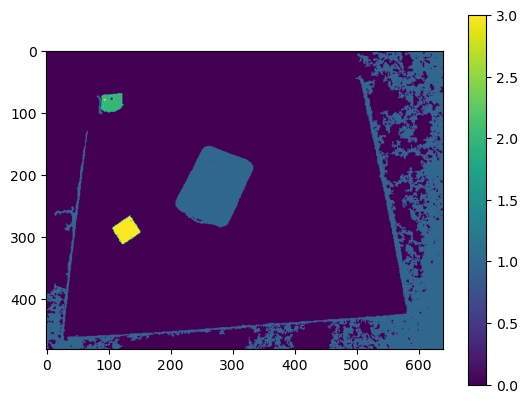

In [3]:
#turn the image into a 4-channel map

img = generate_map(background_color=np.array([119, 104, 215]),
    obstacle_color=np.array([0, 0, 0]),
    thymio_color=np.array([255, 190, 130]),
    target_color=np.array([255, 140, 100]),
    img_path="output/picture.png")

## 4. Global Navigation


D:\UNI\Master\Sem6\BMR\Thytanic\global_navigation.py:34: RuntimeWarning: invalid value encountered in scalar divide
  avg = np.sum(window) / window.size


[]

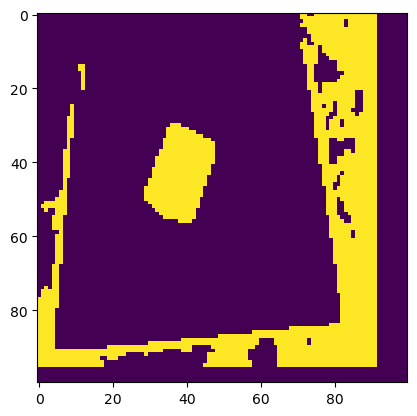

In [4]:
endsize = [100, 100]

#this line generates the original enposition, thymio position, and the obstacle channel
thymiopos, endpos, obstacleimage = downsamplingprep(img, endsize, 5, 5)

#this line turns obstacleimage into its downsampled version with enlarged obstacles
preppedimage = downsampling(obstacleimage, endsize, 5, 0.2)


plt.imshow(preppedimage)
plt.plot()

[]

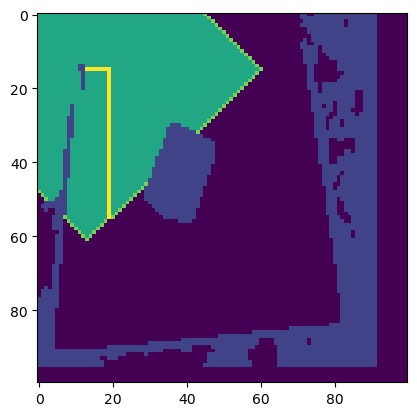

In [5]:
path, exploredpoints, unexploredpoints = pathfinder(thymiopos, endpos, preppedimage)

testimage = preppedimage.copy()

for k in path:
    testimage[k[0], k[1]] += 2
    
for k in exploredpoints:
    testimage[k[0], k[1]] += 3

for k in unexploredpoints:
    testimage[k[0], k[1]] += 4


plt.imshow(testimage)
plt.plot()

## 5. Kalman Filter

## 6. Local Navigation

![Local Navigation Algorithm](img/local_nav.png)

In [ ]:
# Main script to establish connection and start movement
try:
    print("Connecting to Thytanic...")
    thytanic.establish_connection()
    print("Connection established!")

    # Set the robot to GLOBAL_MOVEMENT state
    thytanic.robot_state = ThytanicState.GLOBAL_MOVEMENT
    thytanic.set_wheel_speed(100, 100)
    print("Thytanic state set to GLOBAL_MOVEMENT.")

    # Start the robot movement loop
    while True:
        thytanic.update_robot_state()

        # Print the proximity sensor values
        sensor_values = thytanic.read_proximity_sensors()
        print("Proximity sensor readings -- threshold of 2000 for detection:", sensor_values)

except KeyboardInterrupt:
    # Handle interruption and stop the robot safely
    print("\nStopping the Thytanic...")
    thytanic.disconnect()
    print("Thytanic stopped and disconnected.")

finally:
    print("Session ended.")

Connecting to Thytanic...
Connection established!
Thytanic state set to GLOBAL_MOVEMENT.
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 1826, 0, 0]
Proximity sensor readings: [0, 0, 182

## 7. Main Loop

## 8. Stopping

## 9. Conclusion